In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Loading

Loadig the wage data for a group of men from the Atlantic region of the United States. For this part, we are only trying to understand the relationship between "year", "age", "education", and "wage". 

In [8]:
df = pd.read_csv('../data/mid_atlantic_wages.csv')
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [9]:
df = df[['year', 'age', 'education', 'wage']]
df

,year,age,education,wage
0,2006,18,1. < HS Grad,75.043154
1,2004,24,4. College Grad,70.476020
2,2003,45,3. Some College,130.982177
3,2003,43,4. College Grad,154.685293
4,2005,50,2. HS Grad,75.043154
...,...,...,...,...
2995,2008,44,3. Some College,154.685293
2996,2007,30,2. HS Grad,99.689464
2997,2005,27,1. < HS Grad,66.229408
2998,2005,27,3. Some College,87.981033


### Understanding Data Columns

In [11]:
sorted(df['year'].unique())

[2003, 2004, 2005, 2006, 2007, 2008, 2009]

In [13]:
sorted(df['education'].unique())

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

In [15]:
df['age'].describe()

count    3000.000000
mean       42.414667
std        11.542406
min        18.000000
25%        33.750000
50%        42.000000
75%        51.000000
max        80.000000
Name: age, dtype: float64

In [16]:
df['wage'].describe()

count    3000.000000
mean      111.703608
std        41.728595
min        20.085537
25%        85.383940
50%       104.921507
75%       128.680488
max       318.342430
Name: wage, dtype: float64

### Making the plots

[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5')]

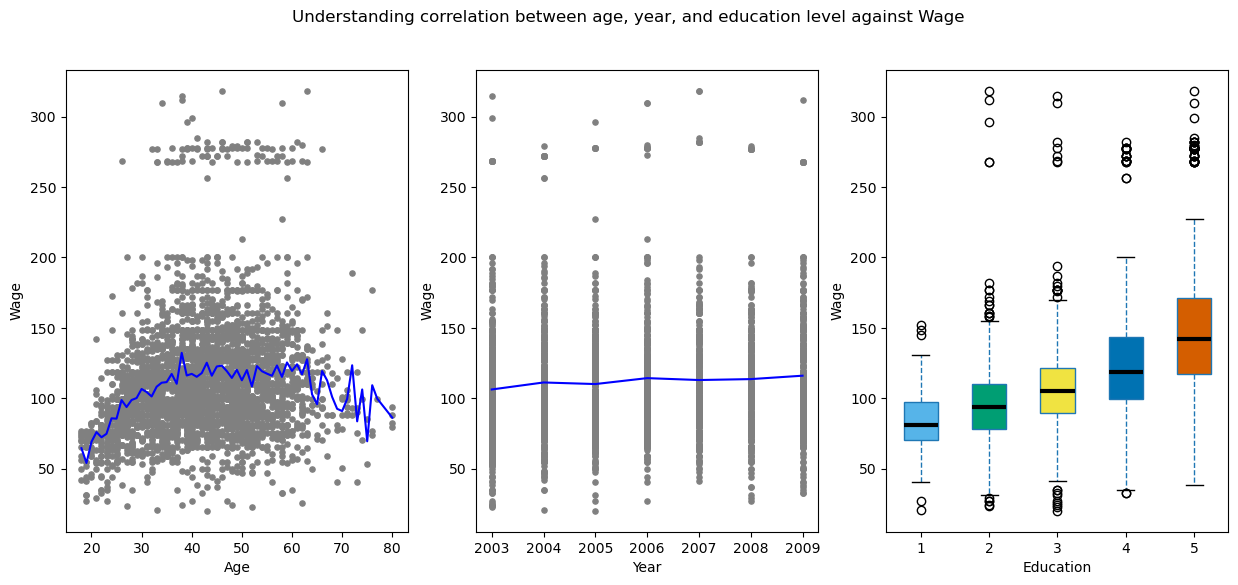

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6))
fig.suptitle('Understanding correlation between age, year, and education level against Wage')

# Prepping data for graph 1
wage_averaged_by_age_df = df.groupby(['age'])['wage'].mean().reset_index().sort_values('age')

# Plotting graph 1
ax1.scatter(df['age'], df['wage'], s = 14, color = 'gray', alpha = 1)
ax1.plot(wage_averaged_by_age_df['age'], wage_averaged_by_age_df['wage'], color = 'blue')
ax1.set_ylabel('Wage')
ax1.set_xlabel('Age')

# Prepping data for graph 2
wage_averaged_by_year_df = df.groupby(['year'])['wage'].mean().reset_index().sort_values('year')

# Plotting graph 2
ax2.scatter(df['year'], df['wage'], s = 14, color = 'gray', alpha = 1)
ax2.plot(wage_averaged_by_year_df['year'], wage_averaged_by_year_df['wage'], color = 'blue')
ax2.set_ylabel('Wage')
ax2.set_xlabel('Year')

# Prepping data for graph 3
edu_renamed_df = df.copy()
edu_renamed_df['education'] = edu_renamed_df['education'].apply(lambda x: x.split('.')[0].strip())

# Plotting graph 3
grouped = edu_renamed_df.groupby('education')[['wage']]
ax3, props = grouped.boxplot(subplots=False, rot=0, ax = ax3, return_type='both', patch_artist = True,)

colors = ['#56B4E9', '#009E73', '#F0E341', '#0072B2', '#D45E00']
for i,box in enumerate(props['boxes']):
    box.set_facecolor(colors[i])

for i,line in enumerate(props['medians']):
    line.set_color('black')
    line.set_linewidth(3)

for i,line in enumerate(props['whiskers']):
    line.set_linestyle('--')

ax3.grid(False)
ax3.set_ylabel('Wage')
ax3.set_xlabel('Education')
x_ticks = ax3.get_xticklabels() 
ax3.set_xticklabels([tick.get_text().strip('()').split(',')[0] for tick in x_ticks])

### Fixing plot smoothness

By looking at the plots above and then looking at what is in the book, we see that the book has a much smoother average plot. We are going to try to mimic this by using moving averages.

In [101]:
def get_moving_average(series: pd.Series, window = 5):
    return series.rolling(window=window).mean()

In [126]:
# Grouping by Age and getting mean wage
wage_averaged_by_age_df = df.groupby(['age'])['wage'].mean().reset_index().sort_values('age')

# Found that there are certain ages between 18 and 80 that do not have any wage information. 
# In order for the moving average to work, we would want to assume that all the ages are present to make the values equidistant
missing_data = []
for age in range(wage_averaged_by_age_df['age'].min(), wage_averaged_by_age_df['age'].max()):
    if age not in wage_averaged_by_age_df['age'].values:
        missing_data.append([age, np.nan])
missing_wage_averaged_by_age_df = pd.DataFrame(missing_data, columns = wage_averaged_by_age_df.columns)
wage_averaged_by_age_df = pd.concat([wage_averaged_by_age_df, missing_wage_averaged_by_age_df], axis = 0).sort_values('age').reset_index(drop = True)

# We interpolate the missing values by using linear interploation
wage_averaged_by_age_df['wage'] = wage_averaged_by_age_df['wage'].interpolate(method='linear')

# We calculate the moving average by 8 years
wage_averaged_by_age_df['wage_ma_8'] = get_moving_average(wage_averaged_by_age_df['wage'])

[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5')]

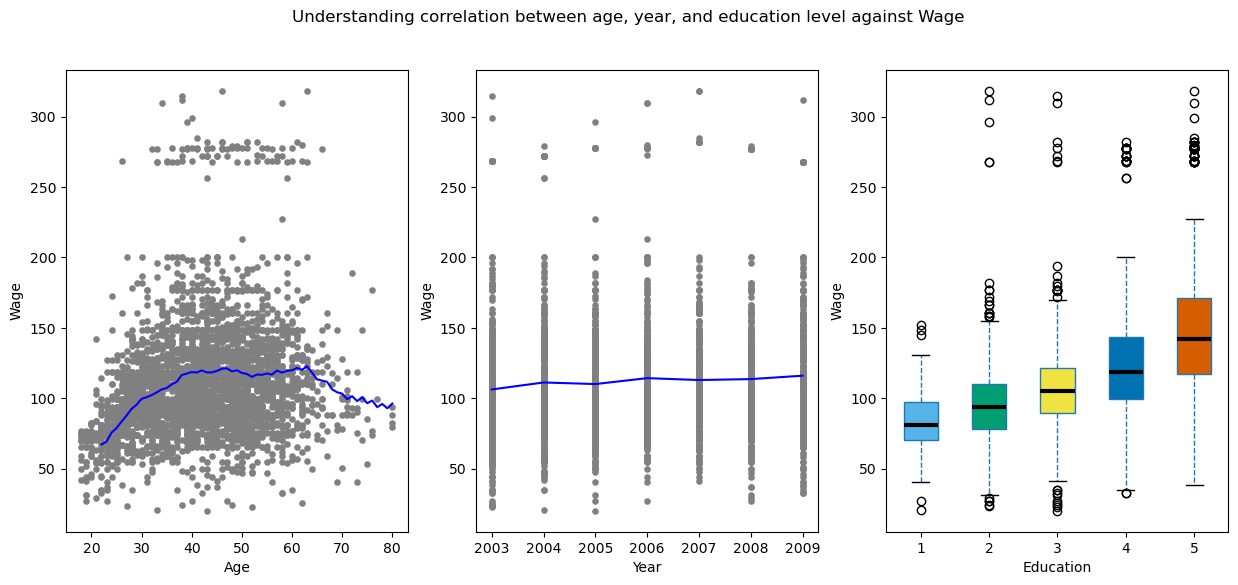

In [127]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 6))
fig.suptitle('Understanding correlation between age, year, and education level against Wage')

# Plotting graph 1
ax1.scatter(df['age'], df['wage'], s = 14, color = 'gray', alpha = 1)
ax1.plot(wage_averaged_by_age_df['age'], wage_averaged_by_age_df['wage_ma_8'], color = 'blue')
ax1.set_ylabel('Wage')
ax1.set_xlabel('Age')

# Prepping data for graph 2
wage_averaged_by_year_df = df.groupby(['year'])['wage'].mean().reset_index().sort_values('year')

# Plotting graph 2
ax2.scatter(df['year'], df['wage'], s = 14, color = 'gray', alpha = 1)
ax2.plot(wage_averaged_by_year_df['year'], wage_averaged_by_year_df['wage'], color = 'blue')
ax2.set_ylabel('Wage')
ax2.set_xlabel('Year')

# Prepping data for graph 3
edu_renamed_df = df.copy()
edu_renamed_df['education'] = edu_renamed_df['education'].apply(lambda x: x.split('.')[0].strip())

# Plotting graph 3
grouped = edu_renamed_df.groupby('education')[['wage']]
ax3, props = grouped.boxplot(subplots=False, rot=0, ax = ax3, return_type='both', patch_artist = True,)

colors = ['#56B4E9', '#009E73', '#F0E341', '#0072B2', '#D45E00']
for i,box in enumerate(props['boxes']):
    box.set_facecolor(colors[i])

for i,line in enumerate(props['medians']):
    line.set_color('black')
    line.set_linewidth(3)

for i,line in enumerate(props['whiskers']):
    line.set_linestyle('--')

ax3.grid(False)
ax3.set_ylabel('Wage')
ax3.set_xlabel('Education')
x_ticks = ax3.get_xticklabels() 
ax3.set_xticklabels([tick.get_text().strip('()').split(',')[0] for tick in x_ticks])

### Average increase in wages from 2003 to 2009

In [135]:
mean_wages_per_year_df = df.groupby(['year'])['wage'].mean().reset_index().sort_values('year').reset_index(drop = True)
mean_wages_per_year_df


,year,wage
0,2003,106.198284
1,2004,111.159997
2,2005,110.037857
3,2006,114.242579
4,2007,112.894556
5,2008,113.551999
6,2009,115.971771


In [137]:
mean_wages_per_year_df['wage'].iloc[-1] - mean_wages_per_year_df['wage'].iloc[0]

9.77348676700987